In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("profiles.csv")
print(df.head())

   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:<br />\n<br />\ni would love to think...   
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                         

Can we predict sex with education level and income?? - KNN

In [2]:
df.sex.value_counts()

m    35829
f    24117
Name: sex, dtype: int64

In [4]:
df.education.value_counts()

graduated from college/university    23959
graduated from masters program        8961
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
dropped out of ph.d program            127
dropped out

In [28]:
higher_educ = ['graduated from college/university', 'graduated from masters program', 'graduated from phd program', 
            'graduated from law school', 'graduated from med school', 'graduated from space camp','space camp', 'ph. d program', 'law school', 'med school', 'masters program', 'college/university']

In [35]:
df["education_count"] = df["education"].apply(lambda row: 1 if row in higher_educ else 0)

1    36170
0    23776
Name: education_count, dtype: int64

In [37]:
dfn = df.dropna(subset=['age', 'education', 'income'])

In [6]:
df.income.value_counts()

-1          48442
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: income, dtype: int64

In [7]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [9]:
df["sex"] = df["sex"].map({"m": 0, "f":1})

In [39]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5)

In [64]:
df_set = df[['income', 'education_count']]
df_labels = df['sex']

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_set, df_labels)

In [66]:
from sklearn.preprocessing import StandardScaler
regularisation_tool = StandardScaler()
X_train_sc = regularisation_tool.fit_transform(X_train)
X_test_sc = regularisation_tool.transform(X_test)

In [67]:
classifier.fit(X_train_sc, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [68]:
y_guess = classifier.predict(X_test_sc)

In [69]:
classifier.score(X_test_sc, y_test)

0.5420030693267498

Can we predict education level with essay text word counts? - Naive Bayes

In [70]:
all_essays = df['essay0'] + df['essay2']+df['essay3']+df['essay4']+ df['essay5']+df['essay6']+df['essay7'] + df['essay8']+df['essay9']

In [76]:
labels = df['sex'].dropna()

In [86]:
train_data, test_data, train_labels, test_labels = train_test_split(all_essays, labels, test_size=0.2, random_state =1)
print(len(train_data))
print(len(test_data))

47956
11990


In [88]:
from sklearn.feature_extraction.text import CountVectorizer

counter = CountVectorizer()
counter.fit(train_data.apply(lambda x: np.str_(x)))
train_counts = counter.transform(train_data.apply(lambda x: np.str_(x)))
test_counts = counter.transform(test_data.apply(lambda x: np.str_(x)))
print(train_data[3])
print(train_counts[3])

nan
  (0, 85894)	1


In [89]:
from sklearn.naive_bayes import MultinomialNB

classifier1 = MultinomialNB()
classifier1.fit(train_counts, train_labels)
predictions = classifier1.predict(test_counts)

In [90]:
from sklearn.metrics import accuracy_score

print(accuracy_score(test_labels, predictions))

0.6655546288573811


In [91]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(test_labels, predictions))

[[6074 1156]
 [2854 1906]]


Predict income with length of essays and average word length? - Multiple Linear Regression

In [118]:
# dfm = df.dropna(subset=['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5','essay6', 'essay7', 'essay8','essay9'])

In [120]:
df['all_essays'] = df[['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5','essay6', 'essay7', 'essay8','essay9']].astype(str).agg(' '.join, axis=1)
print(df['all_essays'][4])

hey how's it going? currently vague on the profile i know, more to
come soon. looking to meet new folks outside of my circle of
friends. i'm pretty responsive on the reply tip, feel free to drop
a line. cheers. work work work work + play creating imagery to look at:<br />
http://bagsbrown.blogspot.com/<br />
http://stayruly.blogspot.com/ i smile a lot and my inquisitive nature music: bands, rappers, musicians<br />
at the moment: thee oh sees.<br />
forever: wu-tang<br />
books: artbooks for days<br />
audiobooks: my collection, thick (thanks audible)<br />
shows: live ones<br />
food: with stellar friends whenever<br />
movies &gt; tv<br />
podcast: radiolab, this american life, the moth, joe rogan, the
champs nan nan nan nan nan


In [121]:
df["word_length"] = df.apply(lambda row: len(row['all_essays'].split()), axis=1)

In [122]:
 df["average_word_length"] = df.apply(lambda row: sum(len(word) for word in row['all_essays'].split()) / len(row['all_essays'].split()), axis=1)

In [123]:
df['income'].isna().any()

False

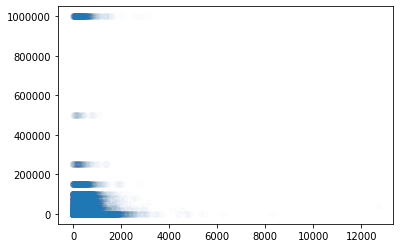

In [124]:
from matplotlib import pyplot as plt

plt.scatter(df['word_length'], df['income'], alpha=0.01)

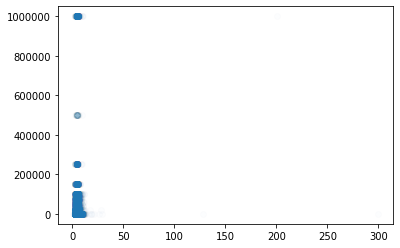

In [125]:
plt.scatter(df['average_word_length'], df['income'], alpha=0.01)

In [126]:
features = df[['average_word_length', 'word_length', 'sex']]

In [127]:
labels = df['income']

In [128]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=1)

In [129]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [130]:
model.score(X_train, y_train)

0.00637788640173842

In [131]:
regularisation_tool = StandardScaler()
X_train_sc = regularisation_tool.fit_transform(X_train)
X_test_sc = regularisation_tool.transform(X_test)

In [138]:
model.fit(X_train_sc, y_train)
model.score(X_train_sc, y_train)

0.00637788640173842

In [134]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(X_train_sc, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [136]:
model1.score(X_train_sc, y_train)

0.8091375427475186

In [137]:
model1.score(X_test_sc, y_test)

0.8038365304420351

In [139]:
sorted(list(zip(['average_word_length', 'word_length', 'sex'],model.coef_)),key = lambda x: abs(x[1]),reverse=True)

[('sex', -7422.294270955046),
 ('average_word_length', 2627.850193958492),
 ('word_length', 109.30114918111212)]

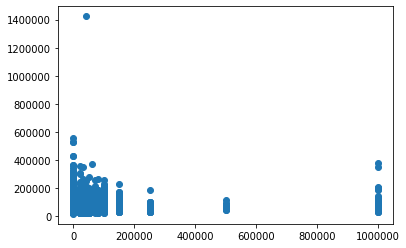

In [140]:
y_predicted = model.predict(X_test)
plt.scatter(y_test, y_predicted)

In [141]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor(n_neighbors = 5)

In [142]:
regressor.fit(X_train_sc, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [143]:
regressor.score(X_test_sc, y_test)

-0.24274121040721994

Predict age with the frequency of “I” or “me” in essays? - Logistic Regression

In [144]:
df.corr()

,age,height,income,sex,education_count,word_length,average_word_length
age,1.000000,-0.022262,-0.001004,0.041481,0.166321,0.083694,0.004093
height,-0.022262,1.000000,0.065049,-0.655448,-0.030009,0.003321,0.013261
income,-0.001004,0.065049,1.000000,-0.074601,-0.003591,0.007056,0.026554
sex,0.041481,-0.655448,-0.074601,1.000000,0.058301,0.016611,-0.016134
education_count,0.166321,-0.030009,-0.003591,0.058301,1.000000,0.066683,0.024566
word_length,0.083694,0.003321,0.007056,0.016611,0.066683,1.000000,0.101554
average_word_length,0.004093,0.013261,0.026554,-0.016134,0.024566,0.101554,1.000000


In [146]:
df["ego_count"] = df.apply(lambda row: row['all_essays'].count('I')+row['all_essays'].count('me'), axis=1)
df['ego_count'].value_counts()

0      4079
5      3033
7      2946
6      2892
8      2866
       ... 
109       1
108       1
107       1
265       1
159       1
Name: ego_count, Length: 130, dtype: int64

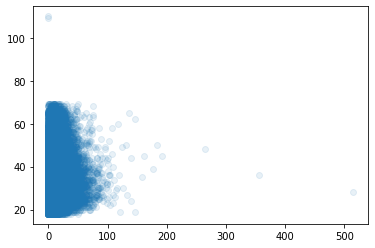

In [149]:
plt.scatter(df['ego_count'], df['age'], alpha=0.1)

In [181]:
X = df[['ego_count', 'sex']]
y = df['age']

In [175]:
# X.values.reshape(-1,1)

array([[22],
       [ 0],
       [ 4],
       ...,
       [ 0],
       [24],
       [ 0]], dtype=int64)

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [183]:
# X_train.values.reshape(-1,1)
regularisation_tool = StandardScaler()
X_train_sc = regularisation_tool.fit_transform(X_train)
X_test_sc = regularisation_tool.transform(X_test)

In [185]:
model1 = LogisticRegression(max_iter=50)
model1.fit(X_train_sc, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [186]:
model1.score(X_test_sc, y_test)

0.06188490408673895